<a href="https://colab.research.google.com/github/JoaquinV13/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_A09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3

Lucas Viñals de Luna

# Introducción

Se desarrolla un modelo de red neuronal convolucional con el objetivo de predecir, con la mayor precisión posible, la clase correspondiente para cada una de las 10,000 imágenes de prueba. Estas imágenes forman parte de la base de datos Cifar-100, que incluye 50,000 imágenes de entrenamiento y 10,000 de prueba. Cada imagen tiene una resolución de 32x32 píxeles y es a color, presentando así tres dimensiones debido a que el formato de color utilizado es RGB.

Cada imagen está etiquetada con una de las cien categorías disponibles en la base de datos. Adicionalmente, estas categorías están agrupadas en veinte superclases, cada una de las cuales contiene cinco categorías. En cada categoría hay 500 imágenes.

In [1]:
# Se inicializan librerías necesarias
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, MaxPooling2D, Conv2D, BatchNormalization


import matplotlib.pyplot as plt
import numpy as np

# Se comprueba versión tensorflow.
import tensorflow as tf

print(tf.__version__)

2.15.0


Índice que se va a seguir en esta memoria.

In [2]:
from tabulate import tabulate

# Se definen los nombres de las secciones
secciones = [
    "Definir el problema y montar un conjunto de datos",
    "Elegir una medida del éxito",
    "Decidir un protocolo de evaluación",
    "Preparación de los datos",
    "Desarrollar un modelo que lo haga mejor que un modelo de referencia",
    "Ampliación: desarrollar un modelo con sobreajuste",
    "Regularización del modelo y ajuste de los hiperparámetros"
]

# Se crear una lista con números del 1 al 7 para enumerar las secciones
numeros_secciones = list(range(1, 8))

# Se crea una lista de listas con los números y los nombres de las secciones
tabla_data = list(zip(numeros_secciones, secciones))

# Se crea la tabla utilizando tabulate
tabla = tabulate(tabla_data, headers=["Número", "Sección"], tablefmt="grid")

# Se imprime la tabla
print(tabla)

+----------+---------------------------------------------------------------------+
|   Número | Sección                                                             |
+==========+=====================================================================+
|        1 | Definir el problema y montar un conjunto de datos                   |
+----------+---------------------------------------------------------------------+
|        2 | Elegir una medida del éxito                                         |
+----------+---------------------------------------------------------------------+
|        3 | Decidir un protocolo de evaluación                                  |
+----------+---------------------------------------------------------------------+
|        4 | Preparación de los datos                                            |
+----------+---------------------------------------------------------------------+
|        5 | Desarrollar un modelo que lo haga mejor que un modelo de referencia |
+---

1. DEFINICIÓN DEL PROBLEMA Y CONFIGURACIÓN DEL CONJUNTO DE DATOS

**Datos de Entrada:** Imágenes a color con resolución de 32x32 píxeles, compuestas por tres canales (rojo, verde, azul).

**Objetivo:** Clasificar las imágenes en una de las 100 categorías del conjunto de datos CIFAR-100.

**Tipo de Problema:** Clasificación multiclase.

**Caracterización de las entradas y salidas:**

Entradas (X): Imágenes de 32x32 píxeles con información de color en formato RGB.

Salidas (Y): Etiquetas de clase que indican la categoría correspondiente a cada imagen.

**Hipótesis:**

Las salidas pueden ser predichas a partir de las entradas proporcionadas, asumiendo la existencia de patrones y características distintivas en las imágenes que facilitan la clasificación.
Los datos son suficientemente informativos, lo que implica que las imágenes contienen la información necesaria para que el modelo aprenda la relación entre las entradas y las salidas.

**Modelo Operativo:** Se utilizará un modelo de Red Neuronal Convolucional (CNN) implementado en Keras, dado que las CNN son altamente efectivas para tareas de clasificación de imágenes.

**Problemas no Resueltos:** En este contexto, no nos enfrentamos a problemas de "no estacionariedad", ya que estamos trabajando con imágenes de un conjunto de datos fijo.

In [3]:
# Se procede a cargar la base de datos solo teniendo en cuenta las etiquetas
# finas, las clases.



(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data(label_mode="fine")

print ('\nDimensión de las imágenes de entrenamiento:',train_images.shape)
print ('Dimensión de las etiquetas de entrenamiento:',train_labels.shape)

print ('Dimensión de las imágenes de test:',test_images.shape)
print ('Dimensión de las etiquetas de test:',test_labels.shape)

169001437/169001437 [==============================] - 18s 0us/step

Dimensión de las imágenes de entrenamiento: (50000, 32, 32, 3)
Dimensión de las etiquetas de entrenamiento: (50000, 1)
Dimensión de las imágenes de test: (10000, 32, 32, 3)
Dimensión de las etiquetas de test: (10000, 1)


Como se mencionó anteriormente, se dispone de 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba, cada una con una resolución de 32x32 píxeles y a color, representadas por tres matrices correspondientes a los canales R-G-B. Por lo tanto, cada conjunto de datos puede ser representado como un tensor de cuatro dimensiones.

Además, se ha verificado que el número de etiquetas coincide con el número de imágenes, es decir, hay 50,000 etiquetas para las 50,000 imágenes de entrenamiento y 10,000 etiquetas para las 10,000 imágenes de prueba.

A continucación, se procede a representar las 10 primeras imágenes del conjunto Cifar-100 junto con su clase correspondiente.

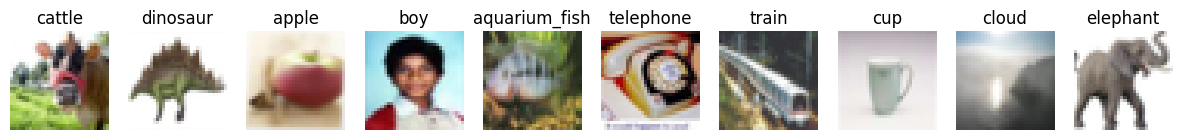

In [4]:
# Definir las clases correspondientes al conjunto de datos CIFAR-100
fine_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Imprimir las 10 primeras imágenes y sus clases
plt.figure(figsize=(15, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(fine_classes[train_labels[i][0]])
    plt.axis('off')

plt.show()

Posteriormente, se verifica que haya un número uniforme de imágenes por clase. Como se mencionó al inicio de la práctica, este número es de 500 imágenes por clase.

2. SELECCIÓN DE UNA MEDIDA DE ÉXITO

La medida de éxito será la precisión del modelo, definida como la proporción de imágenes correctamente clasificadas en el conjunto de datos de prueba. Dado que se trata de un problema de clasificación multiclase, es crucial asegurar que exista una probabilidad uniforme de encontrar imágenes de cada clase, es decir, que el conjunto de datos contenga un número equilibrado de imágenes para cada una de las 100 clases. Como se mencionó anteriormente, este número es de 500 imágenes por clase. Se procederá a verificar que los datos extraídos cumplan con esta distribución uniforme.

In [5]:
# Contar la frecuencia de cada clase en el conjunto de entrenamiento
class_counts = dict(zip(fine_classes, np.bincount(train_labels.flatten())))

# El número de imágenes por clase.
N = 0
for class_name, count in class_counts.items():
    if count == 500:
      N = N + 1
print(N) # Número de clases con 500 imágenes.

100


Efectivamente, cada clase contiene 500 imágenes, cumpliendo con la distribución uniforme de 100 clases con 500 imágenes cada una.

3. ESTABLECIMIENTO DE UN PROTOCOLO DE EVALUACIÓN

Dado el contexto actual, con 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba, se implementará un protocolo de evaluación del tipo hold-out. Al asignar el 20% de los datos de entrenamiento, es decir, 10,000 imágenes, al conjunto de validación, se garantiza un tamaño suficiente para obtener valores de precisión estadísticamente significativos. Esto es debido a que las 10,000 imágenes utilizadas para la validación proporcionan una muestra representativa y adecuada del conjunto de datos, permitiendo así afirmar con alta confianza los valores de precisión obtenidos.

Por lo tanto, se destinará el 20% de las imágenes de entrenamiento como conjunto de validación.

4. PREPARACIÓN DE LOS DATOS

Los datos están organizados en un tensor de cuatro dimensiones. La primera dimensión corresponde al índice de la imagen, la segunda y tercera dimensiones se refieren al número de píxeles en las filas y columnas, respectivamente, y la última dimensión representa la profundidad del color, que es 3 para imágenes RGB (rojo, verde y azul). Las redes neuronales convolucionales (CNN) operan sobre tensores 3D, donde las capas iniciales aprenden características básicas como bordes y líneas. Las capas subsiguientes pueden reconocer patrones más complejos basados en estas características fundamentales. A medida que se avanza en profundidad en las capas convolucionales, estas son capaces de identificar relaciones y elementos más específicos y complejos.

Para preparar los datos, los valores de los píxeles, originalmente definidos en un intervalo de 0 a 255, se normalizan para que se encuentren en un rango de 0 a 1.

En función del rendimiento del modelo, se podrán aplicar técnicas adicionales de ingeniería de características con el objetivo de evitar el sobreajuste y mejorar la capacidad de generalización del modelo.

In [6]:
# Se normalizan los valores de las matrices que componen las imágenes.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

5. DESARROLLO DE UN MODELO SUPERIOR A UN MODELO DE REFERENCIA

La probabilidad de clasificar correctamente una imagen de manera aleatoria en un conjunto de 10,000 imágenes de prueba, considerando que hay 100 imágenes por clase, es: \( P = \frac{100}{10,000} = \frac{1}{100} = 1\% \).

Por lo tanto, una precisión básica del 1% sería un punto de partida. Mejorar este porcentaje inicial ya representaría un progreso significativo. Se busca desarrollar un modelo preliminar y, a partir de este, implementar mejoras continuas para incrementar su precisión.

Es necesario tomar decisiones clave en el desarrollo del modelo. La primera decisión es seleccionar la función de activación para la última capa. Dado que se trata de una clasificación multiclase, se empleará una capa densa (Dense) con 100 neuronas (correspondientes a las 100 clases) y la función de activación softmax. La función softmax convierte un vector de valores en una distribución de probabilidades, representando la confianza relativa en cada clase.

Este enfoque permitirá que el modelo proporcione una probabilidad para cada clase, facilitando la interpretación de la confianza del modelo en sus predicciones.

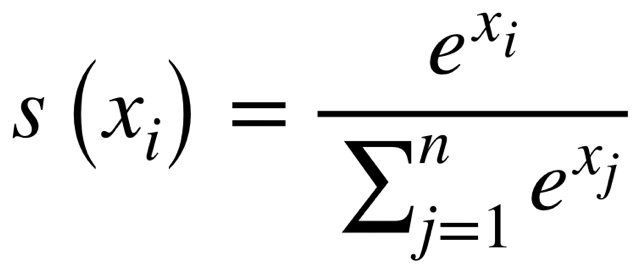

La función exponencial \( e^x \) asegura que los valores generados sean no negativos, y al dividir por la suma de estas exponenciales, se normalizan para que la suma total sea 1.

La función de pérdida debe ser coherente con el tipo de problema. Por ello, utilizaremos inicialmente `sparse_categorical_crossentropy` (que acepta etiquetas como números enteros) y posteriormente probaremos con `categorical_crossentropy` (utilizando datos en formato one-hot encoding).

Considerando las explicaciones proporcionadas en clases y prácticas anteriores, descartamos el optimizador SGD y optamos por `RMSprop` y `Adam` debido a sus mejores propiedades de convergencia y manejo de tasas de aprendizaje adaptativas.

6 y 7. EXPANSIÓN: DESARROLLO DE UN MODELO CON SOBREAJUSTE Y POSTERIOR REGULARIZACIÓN Y AJUSTE DE HIPERPARÁMETROS

Estos dos apartados se abordarán de manera conjunta a medida que avance el proyecto. Inicialmente, se desarrollará un modelo que puede estar sujeto a sobreajuste. Posteriormente, se implementarán técnicas de regularización para mitigar este efecto y se procederá al ajuste fino de los hiperparámetros del modelo para optimizar su rendimiento general.

Se comienza con un modelo básico de red convolucional (CNN) y a continuación se explican sus diferentes partes:

Las capas Conv2D son esenciales en una CNN porque permiten que la red aprenda patrones y características importantes en las imágenes usando filtros convolucionales. En este modelo, hay dos capas Conv2D. La primera tiene 32 filtros con un tamaño de kernel de (5, 5), y la segunda tiene 64 filtros con el mismo tamaño de kernel de (5, 5). A medida que se avanza en las capas convolucionales, la red puede aprender características más complejas.

Las capas de MaxPooling2D se utilizan para reducir la dimensión espacial de la representación de la imagen y, al mismo tiempo, conservar las características más importantes. Estas capas ayudan a hacer que la representación sea más manejable y reducen el costo computacional. Después de cada capa Conv2D, hay una capa MaxPooling2D que reduce a la mitad las dimensiones espaciales de la salida de la capa convolucional.

La capa Flatten se coloca después de las capas convolucionales y de pooling para convertir la salida 2D a un vector 1D antes de conectarla a capas densas (totalmente conectadas). En este caso, después de las capas Conv2D y MaxPooling2D, la capa Flatten se utiliza para aplanar la salida antes de pasarla a la capa densa.

La capa Dense es una capa totalmente conectada que produce la salida final de la red. En este modelo, la capa Dense tiene 100 neuronas con una función de activación softmax. La salida tiene 100 neuronas porque se está trabajando con un problema de clasificación con 100 clases diferentes.

En resumen, este modelo sigue una estructura básica de CNN: comienza con capas convolucionales para aprender características, seguido de capas de pooling para reducir la dimensionalidad, y termina con una capa densa para la clasificación.

In [7]:
# Primer modelo.
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='softmax'))

Se entrena el modelo y se valida con los propios datos de prueba. Aunque no es una buena práctica validar con los datos de prueba, este modelo es muy básico y no se desarrollará más allá de lo necesario.

Epoch 1/5
250/250 [==============================] - 6s 10ms/step - loss: 4.0174 - accuracy: 0.0982 - val_loss: 3.5888 - val_accuracy: 0.1716
Epoch 2/5
250/250 [==============================] - 2s 7ms/step - loss: 3.4601 - accuracy: 0.1918 - val_loss: 3.3139 - val_accuracy: 0.2253
Epoch 3/5
250/250 [==============================] - 2s 7ms/step - loss: 3.1462 - accuracy: 0.2543 - val_loss: 3.0873 - val_accuracy: 0.2649
Epoch 4/5
250/250 [==============================] - 2s 7ms/step - loss: 2.9222 - accuracy: 0.2958 - val_loss: 2.9207 - val_accuracy: 0.2981
Epoch 5/5
250/250 [==============================] - 2s 8ms/step - loss: 2.7456 - accuracy: 0.3320 - val_loss: 2.8304 - val_accuracy: 0.3181


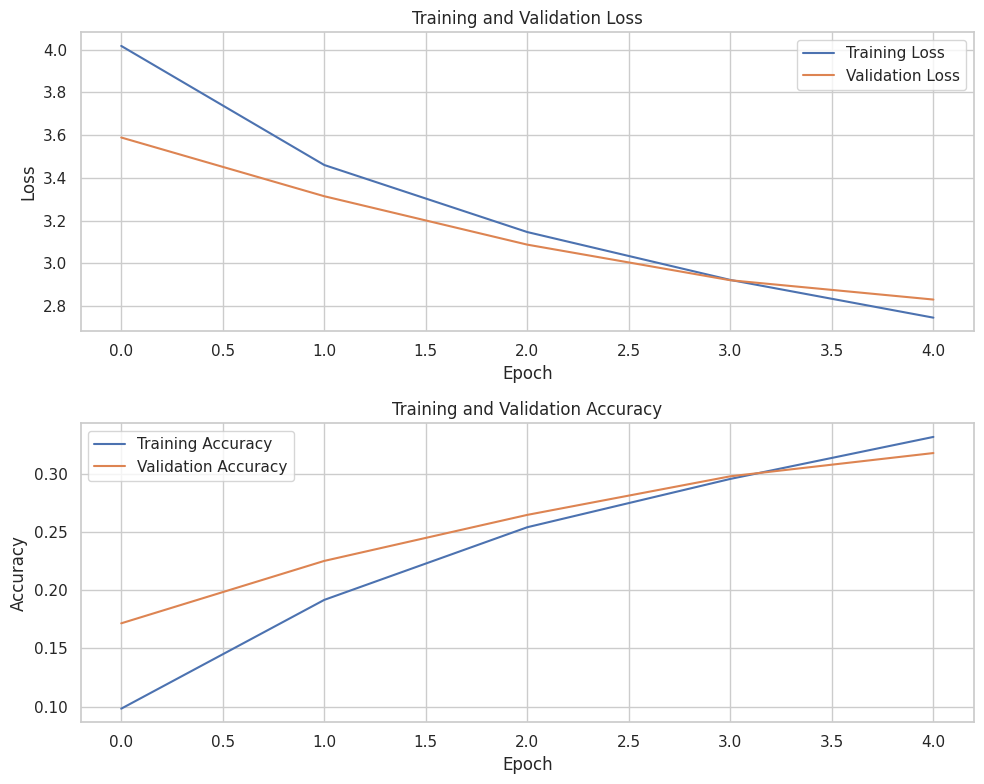

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenamiento del modelo

history = model.fit(train_images, train_labels, batch_size=200, epochs=5, verbose=1, validation_data=(test_images, test_labels))

# Obtener datos de la historia del entrenamiento
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Crear subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Pérdida
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de Precisión
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

En este primer modelo básico, al predecir el conjunto de 10,000 imágenes de prueba, se obtiene una precisión cercana al 30%. Es importante destacar que la precisión en el conjunto de datos de entrenamiento es aproximadamente del 32%.

A continuación, se van a graficar las tres funciones de activación que se utilizarán, incluyendo ELU que se implementará posteriormente.

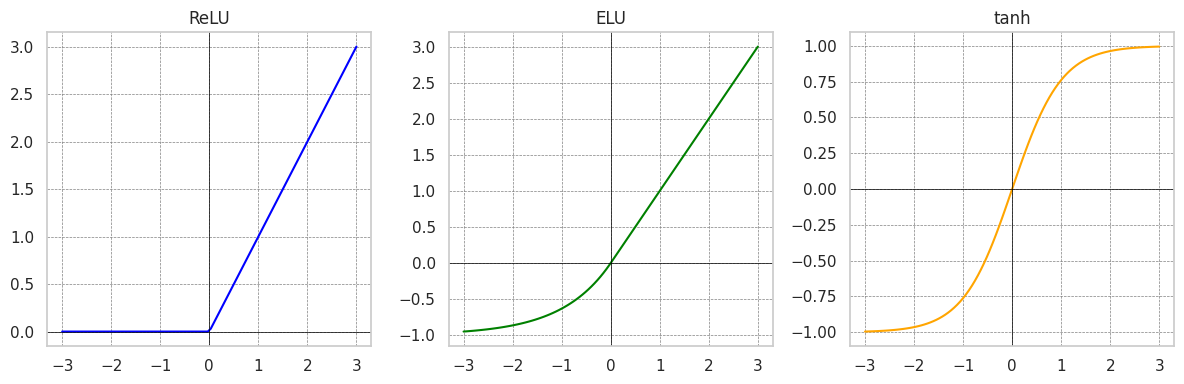

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores
x = np.linspace(-3, 3, 100)

# Funciones de activación
relu = np.maximum(0, x)
elu = np.where(x > 0, x, np.exp(x) - 1)
tanh = np.tanh(x)

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico de ReLU
axes[0].plot(x, relu, label='ReLU', color='blue')
axes[0].set_title('ReLU')
axes[0].axhline(0, color='black',linewidth=0.5)
axes[0].axvline(0, color='black',linewidth=0.5)
axes[0].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Gráfico de ELU
axes[1].plot(x, elu, label='ELU', color='green')
axes[1].set_title('ELU')
axes[1].axhline(0, color='black',linewidth=0.5)
axes[1].axvline(0, color='black',linewidth=0.5)
axes[1].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Gráfico de tanh
axes[2].plot(x, tanh, label='tanh', color='orange')
axes[2].set_title('tanh')
axes[2].axhline(0, color='black',linewidth=0.5)
axes[2].axvline(0, color='black',linewidth=0.5)
axes[2].grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

En el primer modelo, se ha utilizado la función de activación 'relu' en las capas convolucionales. Para el segundo modelo, se cambiará a 'tanh'. Además, se añadirá el argumento `padding='same'` en las capas convolucionales, lo que asegura que el tamaño de salida sea el mismo que el tamaño de entrada, agregando ceros en los bordes si es necesario.

Se ha añadido una capa Dense con 512 unidades y activación 'relu' después de la capa Flatten.

En la segunda capa convolucional, el tamaño del kernel se ha modificado de (5, 5) a (7, 7). Esto significa que en esa capa se están utilizando filtros convolucionales con una ventana más grande, lo que puede ayudar al modelo a capturar patrones más complejos en los datos de entrada.

También se ha incorporado una capa Dropout con una tasa del 30% después de la capa Dense. El Dropout ayuda a prevenir el sobreajuste al desactivar aleatoriamente un porcentaje de unidades durante el entrenamiento.

In [10]:
# Segundo modelo.

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (7, 7), activation='tanh', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))

Antes de compilar y entrenar el segundo modelo, se va a realizar el One-Hot Encoding de las etiquetas de entrenamiento y prueba utilizando to_categorical de keras.utils.

También se muestra el tamaño de las etiquetas depués de haberlas pasado a one-hot encoding.

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print (train_labels.shape)
print (test_labels.shape)

(50000, 100)
(10000, 100)


En el segundo modelo, se ha cambiado la función de pérdida a 'categorical_crossentropy' debido al uso de One-Hot Encoding.

Con One-Hot Encoding, cada etiqueta se convierte en un vector de 100 elementos, ya que hay 100 categorías. En este vector, la posición correspondiente a la categoría indicada (por ejemplo, 1, 2, 3, etc.) contiene un 1, mientras que todas las demás posiciones contienen un 0. En otras palabras, la posición del 1 en el vector indica la categoría que representa.

Además, el optimizador se ha cambiado a 'adam'.

In [12]:
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

model.fit(train_images, train_labels,
batch_size=200,
epochs=5,
verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
250/250 [==============================] - 6s 11ms/step - loss: 3.6645 - accuracy: 0.1546
Epoch 2/5
250/250 [==============================] - 3s 12ms/step - loss: 2.9821 - accuracy: 0.2755
Epoch 3/5
250/250 [==============================] - 3s 12ms/step - loss: 2.5858 - accuracy: 0.3546
Epoch 4/5
250/250 [==============================] - 3s 11ms/step - loss: 2.2830 - accuracy: 0.4145
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 2.4158 - accuracy: 0.3940


El modelo muestra una mejora, pero es importante mencionar el número de épocas y el tamaño del batch. Tras numerosas pruebas, descubrimos que cuando el modelo entrenaba muy rápido, la precisión en los datos de prueba disminuía considerablemente. Por lo tanto, nos esforzamos por obtener un modelo que no entrenara rápidamente. Al hacerlo, el modelo adquiría patrones menos específicos de los datos de entrenamiento y generalizaba mejor, en lugar de maximizar únicamente la precisión de entrenamiento para obtener mejores resultados en los datos de prueba. Por esta razón, nos aseguramos de entrenar modelos de forma más lenta para que pudieran captar patrones más generales de los datos.

Se procede a comprobar de forma visual si con un cambio de representación de tipo polar en las imágenes conllevan alguna ventaja.

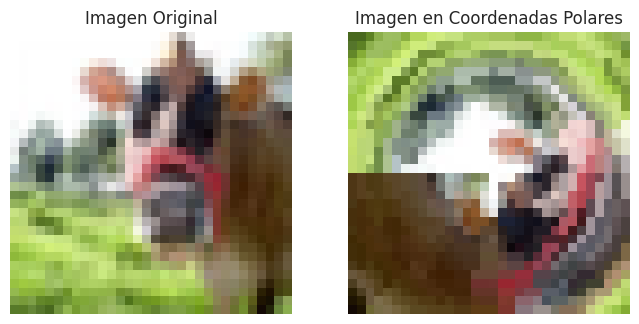

In [13]:
# Cargar el conjunto de datos CIFAR-100
(train_images2, train_labels2), (_, _) = keras.datasets.cifar100.load_data(label_mode="fine")

# Seleccionar una imagen específica para la transformación
imagen_idx = 0
imagen_original = train_images2[imagen_idx]

# Obtener dimensiones de la imagen
alto, ancho, _ = imagen_original.shape

# Coordenadas del centro de la imagen
centro_x = ancho // 2
centro_y = alto // 2

# Crear matrices de coordenadas cartesianas
coord_x, coord_y = np.meshgrid(np.arange(ancho), np.arange(alto))

# Calcular las coordenadas polares
r = np.sqrt((coord_x - centro_x)**2 + (coord_y - centro_y)**2)
theta = np.arctan2(coord_y - centro_y, coord_x - centro_x)

# Transformar las coordenadas cartesianas a polares
r = (r / r.max()) * alto  # Ajustar el rango
theta = ((theta + np.pi) / (2 * np.pi)) * ancho  # Ajustar el rango de ángulos a [0, ancho]

# Convertir a enteros redondeando hacia abajo
r = r.astype(int)
theta = theta.astype(int)

# Mapear las coordenadas polares de nuevo a la imagen original
r = np.clip(r, 0, alto - 1)  # Asegurarse de que los índices estén en el rango válido
theta = np.clip(theta, 0, ancho - 1)
imagen_polar = imagen_original[r, theta]

# Visualizar la imagen original y la imagen transformada
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_polar)
plt.title('Imagen en Coordenadas Polares')
plt.axis('off')

plt.show()



Observando un ejemplo, se puede ver cómo la imagen resulta completamente distorsionada y la información no queda bien definida. Esto dificulta que el modelo pueda reconocer patrones, afectando negativamente su capacidad de entrenamiento. Por este motivo, no se utilizará este tipo de representación.

A continuación, exploraremos diferentes tipos de transformaciones aplicadas al conjunto de imágenes. De esta manera, evaluaremos si la introducción de diversos cambios puede ayudar a que el modelo evite el sobreajuste y mejore su capacidad de generalización.

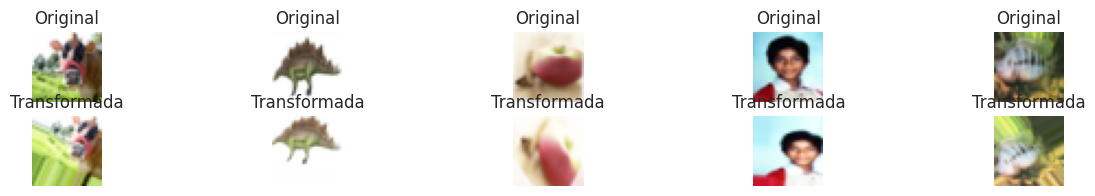

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Cargar el conjunto de datos CIFAR-100
(train_images1, train_labels1), (_, _) = keras.datasets.cifar100.load_data(label_mode="fine")

# Normalizar las imágenes al rango [0, 1]
train_images1 = train_images1.astype('float32') / 255.0


# Crear un generador de imágenes con transformaciones más intensas
datagen = ImageDataGenerator(
    rotation_range=45,      # Rango de rotación máximo en grados
    width_shift_range=0.2,  # Traslación horizontal máxima como fracción de la anchura total
    height_shift_range=0.2, # Traslación vertical máxima como fracción de la altura total
    shear_range=0.2,        # Cizalladura (shear) máxima en sentido antihorario en radianes
    zoom_range=0.3,         # Rango de zoom aleatorio
    preprocessing_function=lambda x: np.sin(x * np.pi / 2)  # Transformación seno
)

# Ajustar el generador al conjunto de datos
datagen.fit(train_images1)

# Visualizar algunas imágenes originales y transformadas
plt.figure(figsize=(15, 2))

for i in range(5):

    # Imagen original
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images1[i])
    plt.title('Original')
    plt.axis('off')

    # Imagen transformada
    plt.subplot(2, 5, i + 6)
    X_batch, _ = next(datagen.flow(train_images1[i:i + 1], train_labels1[i:i + 1], batch_size=1))
    X_batch = np.clip(X_batch, 0, 1)  # Clip para asegurar que los valores estén en el rango [0, 1]
    plt.imshow(X_batch[0])
    plt.title('Transformada')
    plt.axis('off')

plt.show()

Con estos ejemplos se puede deducir que la luminosidad puede aportar información valiosa, ya que permite distinguir mejor los bordes y contornos de los elementos de la imagen, además de diferenciar bien los colores. Sin embargo, aplicar una rotación a la imagen presenta problemas. Esto se debe a que la red convolucional aprende patrones distorsionados de imágenes giradas y, por tanto, puede interpretar incorrectamente que los elementos estarán siempre girados en cualquier situación. Por esta razón, esta transformación no es la mejor opción, a menos que se enfoque de manera diferente.

Después de numerosas y exhaustivas pruebas, llegamos a la conclusión de que la mejor manera de evitar el sobreentrenamiento y enriquecer el modelo con mayor variabilidad en los datos de entrenamiento es aplicar una cierta aleatoriedad en cada época de entrenamiento. Esta aleatoriedad consiste en realizar transformaciones aleatorias al conjunto de imágenes de entrenamiento en cada época. Esto permite que el modelo se entrene con datos diversos y aprenda a reconocer que ciertos elementos, a pesar de sus transformaciones, representan la misma entidad. Por ejemplo, una rosa girada es la misma que una rosa sin girar.

Además, probamos el modelo añadiendo dos capas convolucionales con un max pooling asociado en lugar de una sola capa convolucional. Esto demostró una mejora significativa en nuestras pruebas.

Sin embargo, la profundidad de las capas convolucionales no podía superar dos capas, ya que esto resultaba en un sobreentrenamiento excesivo. Por tanto, limitamos el uso a una o dos capas convolucionales.

Todos estos cambios condujeron a una mejora de casi el 10% en la precisión, alcanzando un 50% de precisión.

El siguiente tipo de transformación simplemente hace que la imagen sea más nítida y la rota un ángulo de 45 grados, realizando muchas menos transformaciones que la anterior.

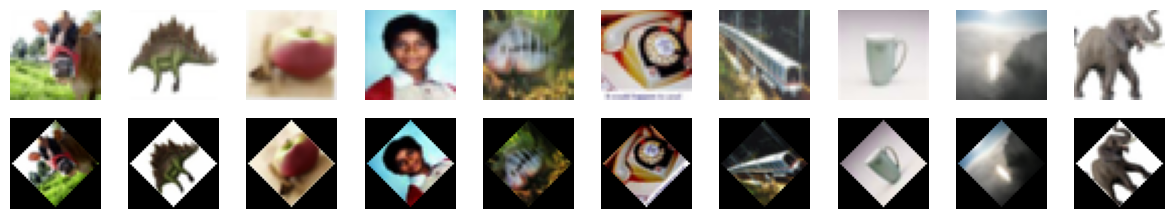

In [15]:

#import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from scipy import ndimage
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Función para aplicar la transformación de brillo a una imagen
def apply_first_and_second_transformations(image):
    # Cambio de brillo
    brighter_image = exposure.adjust_gamma(image, gamma=1.7)
    rotated_image = ndimage.rotate(brighter_image, angle=45)
    return rotated_image

# Imprimir las 10 primeras imágenes originales y transformadas
plt.figure(figsize=(15, 4))
for i in range(10):
    plt.subplot(3, 10, i+1)
    plt.imshow(train_images[i])
    plt.axis('off')

    # Aplicar transformación de brillo a la imagen
    transformed_image = apply_first_and_second_transformations(train_images[i])

    # Normalizar la imagen transformada
    transformed_image = np.clip(transformed_image, 0, 1)  # Asegura que los valores estén en el rango [0, 1]

    plt.subplot(3, 10, i+11)
    plt.imshow(transformed_image)
    plt.axis('off')

plt.show()

Al utilizar esta transformación, como no seguía patrones aleatorios como la anterior, decidimos no emplearla. Sin embargo, la consideramos relevante para futuros modelos, ya que mejora la calidad de las imágenes y permite un mejor estudio de los bordes al girarlas.

En el contexto del aprendizaje profundo y entrenamiento de modelos de redes neuronales, un "callback" es un conjunto de funciones que se ejecutan en ciertos puntos durante el entrenamiento del modelo. Los callbacks se utilizan para realizar acciones específicas, como guardar el modelo, ajustar dinámicamente la tasa de aprendizaje, detener el entrenamiento prematuramente si se cumple cierto criterio, y más.

Destacamos el uso de `ModelCheckpoint`, que guarda el modelo en el disco después de cada época o cuando se mejora en alguna métrica específica.

No consideramos de vital importancia el uso de estos callbacks, por lo que decidimos centrarnos en otras técnicas como la Normalización por Lotes (`Batch Normalization`) y el Dropout.

La normalización por lotes aborda el problema del cambio de covariables internas (`Internal Covariate Shift`). Este cambio ocurre cuando la distribución de las activaciones de una capa varía durante el entrenamiento de la red. A medida que se actualizan los pesos, las activaciones pueden cambiar, lo que obliga a las capas posteriores a adaptarse continuamente. Esto puede ralentizar el entrenamiento y dificultar la búsqueda de una buena configuración de pesos.

La normalización por lotes mitiga este problema normalizando las activaciones de cada capa en mini lotes durante el entrenamiento. Los pasos clave son:

1. **Cálculo de Media y Desviación Estándar:**
   Para cada característica en el mini lote, se calcula la media y la desviación estándar de forma independiente.

2. **Normalización:**
   Las activaciones se normalizan restando la media y dividiendo por la desviación estándar, centrando y escalando las activaciones.

3. **Escalamiento y Desplazamiento:**
   Se introducen dos nuevos parámetros (gamma y beta) por cada característica, que permiten a la red aprender la mejor escala y desplazamiento para las activaciones normalizadas. Estos parámetros se actualizan mediante retropropagación junto con los otros parámetros de la red.

La normalización por lotes tiene varios beneficios:

- Reduce el cambio de covariables internas, permitiendo que la red converja más rápidamente.
- Ayuda a estabilizar y regularizar el proceso de entrenamiento, permitiendo el uso de tasas de aprendizaje más altas.
- Es menos sensible a las elecciones iniciales de los pesos, facilitando el entrenamiento de redes más profundas.

En resumen, la normalización por lotes es una técnica clave en el entrenamiento de redes neuronales, que ayuda a mitigar los problemas asociados con el cambio de covariables internas, facilitando así el entrenamiento de modelos más profundos y eficientes.

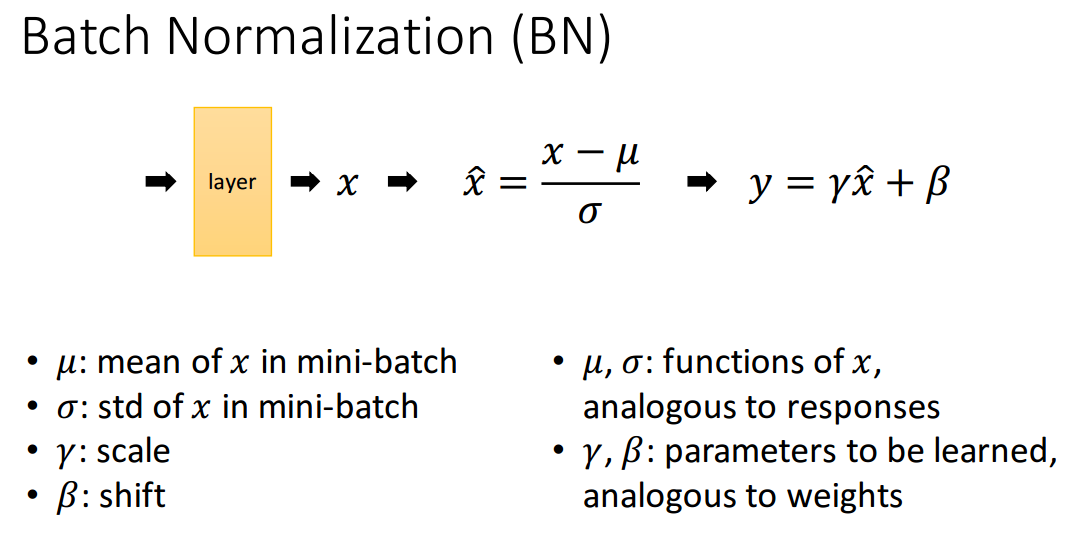

El dropout se aplica durante la fase de entrenamiento y consiste en "apagar" aleatoriamente un conjunto de unidades neuronales en una capa durante cada iteración del entrenamiento. Aquí se explica con más detalle:

En cada iteración del entrenamiento, se selecciona aleatoriamente un conjunto de neuronas en una capa y se "apagan" sus salidas. Esto significa que las salidas de esas neuronas no se utilizan en ese paso específico del entrenamiento.

Al apagar aleatoriamente neuronas en cada iteración, se introduce variabilidad en la red. Esto evita que las neuronas se vuelvan demasiado dependientes entre sí y previene la co-adaptación, donde ciertas neuronas se vuelven especializadas en patrones específicos de los datos.

Al introducir esta variabilidad, el dropout actúa como un mecanismo de regularización. Forzar a la red a aprender con una submuestra de neuronas en cada paso reduce la tendencia del modelo a memorizar ruido o características específicas del conjunto de entrenamiento que no son generalizables.

**Entrenamiento de Subredes:**

Puedes pensar en el dropout como el entrenamiento simultáneo de múltiples subredes, ya que en cada iteración se está entrenando efectivamente una red diferente al apagar diferentes conjuntos de neuronas. Esto ayuda a crear una representación más robusta y generalizable de los datos.

**Escalado Durante la Inferencia:**

Es importante mencionar que durante la fase de inferencia (cuando la red se utiliza para hacer predicciones), no se apaga ninguna neurona. Sin embargo, para mantener la coherencia en la magnitud de las salidas, las activaciones se escalan multiplicándolas por la probabilidad de retención (la probabilidad de no apagar una neurona) durante el entrenamiento.

En resumen, el dropout es una técnica de regularización poderosa que ayuda a prevenir el sobreajuste al introducir variabilidad en la red durante el entrenamiento. Al hacerlo, mejora la capacidad de generalización del modelo y ayuda a crear representaciones más robustas de los datos.


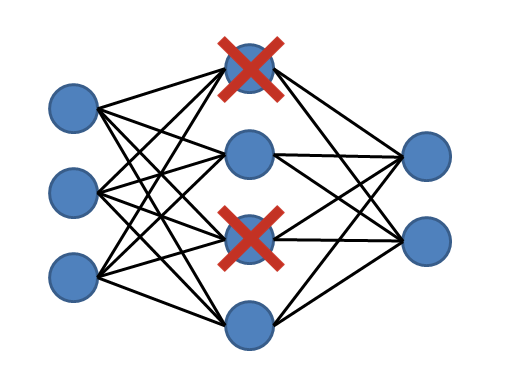


In [16]:
# El mejor modelo. (Validación)
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Crear el modelo.
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))

model.add(BatchNormalization())
model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(100, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

# Separamos los datos de entrenamiento de los de test, 20% de
# los datos de entrenamiento.

X_train = train_images[:40000]
X_test = train_images[40000:]
Y_train = train_labels[:40000]
Y_test = train_labels[40000:]

# Entrenar el modelo utilizando el generador de datos.
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=256),
    steps_per_epoch=len(X_train) / 256,
    epochs=100,
    verbose=1,
    validation_data=(X_test, Y_test)
)

Epoch 1/100
156/156 [==============================] - 34s 166ms/step - loss: 4.1339 - accuracy: 0.0860 - val_loss: 4.7810 - val_accuracy: 0.0367
Epoch 2/100
156/156 [==============================] - 23s 150ms/step - loss: 3.5020 - accuracy: 0.1700 - val_loss: 4.2240 - val_accuracy: 0.0757
Epoch 3/100
156/156 [==============================] - 24s 155ms/step - loss: 3.1617 - accuracy: 0.2286 - val_loss: 3.1547 - val_accuracy: 0.2426
Epoch 4/100
156/156 [==============================] - 25s 158ms/step - loss: 2.9094 - accuracy: 0.2777 - val_loss: 2.7310 - val_accuracy: 0.3080
Epoch 5/100
156/156 [==============================] - 25s 160ms/step - loss: 2.6951 - accuracy: 0.3180 - val_loss: 2.4873 - val_accuracy: 0.3557
Epoch 6/100
156/156 [==============================] - 25s 158ms/step - loss: 2.5200 - accuracy: 0.3532 - val_loss: 3.3039 - val_accuracy: 0.3298
Epoch 7/100
156/156 [==============================] - 26s 166ms/step - loss: 2.3966 - accuracy: 0.3777 - val_loss: 2.3814 -

KeyboardInterrupt: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, 'r', label='Precisión de entrenamiento')
plt.plot(val_acc, 'b', label='Precisión de validación')
plt.title('Precisión de entreno y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Logramos una precisión de validación cercana al 60%. Procedemos a entrenar el modelo nuevamente utilizando la totalidad del conjunto de datos de entrenamiento, sabiendo que no se sobreajusta significativamente hasta aproximadamente la época 90. Observamos que la precisión en los datos de prueba no disminuye de manera significativa hasta este punto. Por lo tanto, se decide entrenar el modelo durante 70 épocas. El tamaño del batch se mantiene constante.

In [ ]:
# El mejor modelo. (Definitivo)

# Crear el modelo
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(100, activation='softmax'))

model.summary()

### Primer Bloque:

La primera capa utiliza un filtro de tamaño 3x3 con 3 canales de entrada y produce 64 filtros. Los parámetros para esta capa se calculan como \((3 \times 3 \times 3 + 1) \times 64\), resultando en 1792 parámetros. Posteriormente, la capa de normalización por lotes (`batch_normalization`) con 64 canales de entrada contribuye con 128 parámetros. La suma total de parámetros para este bloque es de 1920.

### Segundo Bloque:

La capa en este bloque utiliza un filtro de tamaño 3x3 con 64 canales de entrada, generando 64 filtros y un total de 36,928 parámetros. La capa de normalización por lotes (`batch_normalization_1`) con 64 canales de entrada contribuye con 128 parámetros. La suma total de parámetros para este bloque es de 37,056.

### Tercer Bloque:

En el tercer bloque, la capa utiliza un filtro de tamaño 3x3 con 64 canales de entrada para producir 128 filtros, resultando en 73,856 parámetros. La capa de normalización por lotes (`batch_normalization_2`) con 128 canales de entrada añade 256 parámetros. La suma total de parámetros para este bloque es de 74,112.

### Cuarto Bloque:

La capa en el cuarto bloque utiliza un filtro de tamaño 3x3 con 128 canales de entrada para generar 128 filtros, contribuyendo con 147,584 parámetros. La capa de normalización por lotes (`batch_normalization_3`) con 128 canales de entrada suma 256 parámetros. La suma total de parámetros para este bloque es de 147,840.

### Quinto Bloque (Final):

El último bloque incluye capas totalmente conectadas (`dense`). La capa `dense_1` con 2048 entradas y 256 neuronas aporta 524,544 parámetros. La capa de normalización por lotes (`batch_normalization_4`) con 256 canales de entrada añade 512 parámetros. La capa `dense_2` con 256 entradas y 128 neuronas suma 32,896 parámetros. La capa de normalización por lotes (`batch_normalization_5`) con 128 canales de entrada agrega 256 parámetros. Finalmente, la capa `dense_3` con 128 entradas y 100 salidas (clases) contribuye con 12,900 parámetros. La suma total de parámetros para este bloque es de 568,308.

### Total de Parámetros en Todo el Modelo:

La suma de los parámetros de todos los bloques es de 833,572, lo que proporciona el número total de parámetros para el modelo completo. Estos cálculos detallan la contribución de cada capa a la complejidad general del modelo.

In [ ]:

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

# Entrenar el modelo utilizando el generador de datos.
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=256),
    steps_per_epoch=len(train_images) / 256,
    epochs=70,
    verbose=1,
)

results = model.evaluate(test_images, test_labels)

# Conclusión

El mejor modelo que hemos desarrollado para clasificar las 10,000 imágenes en 100 clases distintas utilizando redes convolucionales ha logrado una precisión del 58.5%. Este resultado supera ampliamente la probabilidad básica inicial del 1% con la que comenzamos nuestro trabajo y también mejora significativamente respecto al modelo básico inicial que alcanzaba aproximadamente un 30% de precisión.

A través de diversas mejoras, incluyendo ajustes en los hiperparámetros y en la arquitectura del modelo, así como la introducción de variabilidad mediante la aleatoriedad en la ingeniería de características de los datos de entrenamiento, hemos logrado realizar pruebas que incrementaron el rendimiento del modelo. Estas mejoras culminaron en una precisión cercana al 60%, destacándose como el mejor rendimiento obtenido en nuestras pruebas.